In [3]:
#initializing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)



In [4]:
#read the car_data csv file and display the first five data from the car_data file
car_data = pd.read_csv("car_data.csv")
car_data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
#Checking the columns with null values
car_data.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

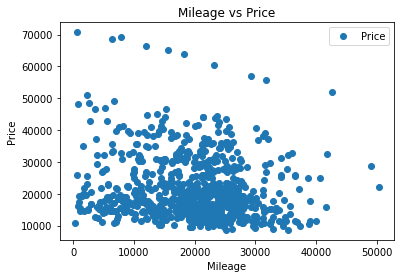

In [6]:
#plotting the graph before predicting to check the linearity
car_data.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [7]:
#PART 1
#Find the linear regression equation for mileage vs price.
X = car_data[["Mileage"]]
y = car_data[["Price"]]

In [8]:
#Initialize the linear regression model and finding the intercept, coeff and r-squared score
Regressor = linear_model.LinearRegression()
Regressor.fit(X,y)
print('intercept:', Regressor.intercept_)
print('coefficients:', Regressor.coef_)
print('r-squared:', Regressor.score(X, y))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r-squared: 0.02046344732348926


By observing the r-squared valued there is no high correlation between the price and the mileage i,e 0.8 and above is considered as high correaltion and we got 0.0204 

Text(0.5, 1.0, 'Mileage vs Price')

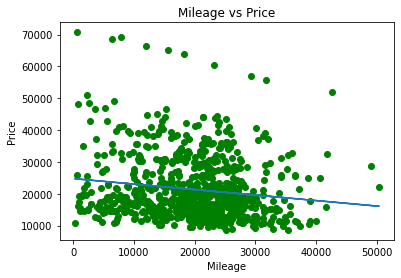

In [9]:
#Chart the original data and the equation on the chart
plt.scatter(X, y, color='g')
plt.plot(X, Regressor.predict(X))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')


In [12]:
R = Regressor.score(X, y)
print("the R-square score is: {}".format(R))
if R > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.02046344732348926
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [20]:
#PART 2
#Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
features = car_data[feature]
target = car_data[['Price']]

In [21]:
#Initializing the linear reggression model and finding the intercept and coeffients of it 
Regressor2 = linear_model.LinearRegression()
Regressor2.fit(features, target)
print('Linear Regression intercept:', Regressor2.intercept_)
print('Linear Regression coefficients:', Regressor2.coef_)

Linear Regression intercept: [6758.7551436]
Linear Regression coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [22]:
#Finding the R-Squared score for the first iteration-1 by considering the above features
R_Squared_Score = Regressor2.score(features, target)
print("the R-square score is: {}".format(R_Squared_Score))
if R_Squared_Score > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.446264353672838
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


In [25]:
#iteration - 2: #Without doors(least important feature)
features2 = car_data[['Mileage', 'Cylinder','Liter','Cruise','Sound', 'Leather']]
target2 = car_data[['Price']]
Regressor2.fit(features2, target2)
print("linear regression co-effs are: {} ".format((Regressor2.coef_)))
print("linear regression intercept is: {} ".format((Regressor2.intercept_)))

linear regression co-effs are: [[-1.68485816e-01  2.91476877e+03  3.51170244e+02  6.35165348e+03
  -1.88987947e+03  3.47721212e+03]] 
linear regression intercept is: [2247.81220038] 


In [27]:
#Finding the R-squared score for the iteration2
R_Squared_Score1 = Regressor2.score(features2, target2)
print("the R-square score is: {}".format(R_Squared_Score1))
if R_Squared_Score1 > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.43014148406475605
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


In [28]:
#iteration - 3: #trying Without liters(least important feature)
features3 = car_data[['Mileage', 'Cylinder','Doors','Cruise','Sound', 'Leather']]
target3 = car_data[['Price']]
Regressor2.fit(features3, target3)
print("linear regression co-effs are: {} ".format((Regressor2.coef_)))
print("linear regression intercept is: {} ".format((Regressor2.intercept_)))

linear regression co-effs are: [[-1.70517079e-01  3.20012460e+03 -1.46339906e+03  6.20551127e+03
  -2.02440071e+03  3.32714331e+03]] 
linear regression intercept is: [7323.16430984] 


In [29]:
#Finding the R-squared score for the iteration3
R_Squared_Score2 = Regressor2.score(features3, target3)
print("the R-square score is: {}".format(R_Squared_Score1))
if R_Squared_Score2 > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.43014148406475605
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


The R-square scores starts decreasing when we remove the least important features like (Doors,liters). So the best combination of factors to predict price is ['Mileage', 'Cylinder','Doors','Liter','Cruise','Sound','Leather']

## Tasks 3, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [31]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(sparse=False)
pd.DataFrame(one_hot_enc.fit_transform(car_data[['Make','Model','Type']]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
800,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
801,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
802,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
one_hot_enc.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Buick', 'x0_Cadillac', 'x0_Chevrolet', 'x0_Pontiac', 'x0_SAAB',
       'x0_Saturn', 'x1_9-2X AWD', 'x1_9_3', 'x1_9_3 HO', 'x1_9_5',
       'x1_9_5 HO', 'x1_AVEO', 'x1_Bonneville', 'x1_CST-V', 'x1_CTS',
       'x1_Cavalier', 'x1_Century', 'x1_Classic', 'x1_Cobalt',
       'x1_Corvette', 'x1_Deville', 'x1_G6', 'x1_GTO', 'x1_Grand Am',
       'x1_Grand Prix', 'x1_Impala', 'x1_Ion', 'x1_L Series',
       'x1_Lacrosse', 'x1_Lesabre', 'x1_Malibu', 'x1_Monte Carlo',
       'x1_Park Avenue', 'x1_STS-V6', 'x1_STS-V8', 'x1_Sunfire',
       'x1_Vibe', 'x1_XLR-V8', 'x2_Convertible', 'x2_Coupe',
       'x2_Hatchback', 'x2_Sedan', 'x2_Wagon'], dtype=object)

In [34]:
dummy_car_data =pd.DataFrame(one_hot_enc.fit_transform(car_data[['Make','Model','Type']]), columns = (one_hot_enc.get_feature_names()))
dummy_car_data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Buick,x0_Cadillac,x0_Chevrolet,x0_Pontiac,x0_SAAB,x0_Saturn,x1_9-2X AWD,x1_9_3,x1_9_3 HO,x1_9_5,x1_9_5 HO,x1_AVEO,x1_Bonneville,x1_CST-V,x1_CTS,x1_Cavalier,x1_Century,x1_Classic,x1_Cobalt,x1_Corvette,x1_Deville,x1_G6,x1_GTO,x1_Grand Am,x1_Grand Prix,x1_Impala,x1_Ion,x1_L Series,x1_Lacrosse,x1_Lesabre,x1_Malibu,x1_Monte Carlo,x1_Park Avenue,x1_STS-V6,x1_STS-V8,x1_Sunfire,x1_Vibe,x1_XLR-V8,x2_Convertible,x2_Coupe,x2_Hatchback,x2_Sedan,x2_Wagon
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
car_data.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [39]:
car_data1 =pd.concat([car_data,dummy_car_data], axis = 1).head()

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [41]:
features4 = car_data1[['Mileage', 'Cylinder', 'Doors', 'Cruise','Sound', 'Leather','x0_Buick', 'x0_Cadillac', 'x0_Chevrolet', 'x0_Pontiac', 'x0_SAAB',
       'x0_Saturn', 'x1_9-2X AWD', 'x1_9_3', 'x1_9_3 HO', 'x1_9_5',
       'x1_9_5 HO', 'x1_AVEO', 'x1_Bonneville', 'x1_CST-V', 'x1_CTS',
       'x1_Cavalier', 'x1_Century', 'x1_Classic', 'x1_Cobalt',
       'x1_Corvette', 'x1_Deville', 'x1_G6', 'x1_GTO', 'x1_Grand Am',
       'x1_Grand Prix', 'x1_Impala', 'x1_Ion', 'x1_L Series',
       'x1_Lacrosse', 'x1_Lesabre', 'x1_Malibu', 'x1_Monte Carlo',
       'x1_Park Avenue', 'x1_STS-V6', 'x1_STS-V8', 'x1_Sunfire',
       'x1_Vibe', 'x1_XLR-V8', 'x2_Convertible', 'x2_Coupe',
       'x2_Hatchback', 'x2_Sedan', 'x2_Wagon']]
target4 = car_data1[['Price']]
Regressor2.fit(features4, target4)
print("linear regression co-effs are: {} ".format((Regressor2.coef_)))
print("linear regression intercept is: {} ".format((Regressor2.intercept_)))

linear regression co-effs are: [[-1.73339943e-01  5.68434189e-14  0.00000000e+00  0.00000000e+00
  -6.46887620e+02  2.16383933e+02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]] 
linear regression intercept is: [19365.04931162] 


In [43]:
R_Squared_Score3 = Regressor2.score(features4, target4)
print("the R-square score is: {}".format(R_Squared_Score3))
if R_Squared_Score3 > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.7923571038234674
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


In [46]:
features5 = car_data1[['Mileage', 'Cylinder','Sound', 'Leather']] #keeping only important features from last iteration result
target5 = car_data1[['Price']]
Regressor2.fit(features5, target5)
print("linear regression co-effs are: {} ".format((Regressor2.coef_)))
print("linear regression intercept is: {} ".format((Regressor2.intercept_)))

linear regression co-effs are: [[-1.73339943e-01  0.00000000e+00 -6.46887620e+02  2.16383933e+02]] 
linear regression intercept is: [19365.04931162] 


In [47]:
R_Squared_Score4 = Regressor2.score(features5, target5)
print("the R-square score is: {}".format(R_Squared_Score4))
if R_Squared_Score4 > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.7923571038234664
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


In [48]:
features6 = car_data1[['Mileage','Sound', 'Leather']] #Removing least important feature - 'cylinder'
target6 = car_data1[['Price']]
Regressor2.fit(features6, target6)
print("linear regression co-effs are: {} ".format((Regressor2.coef_)))
print("linear regression intercept is: {} ".format((Regressor2.intercept_)))

linear regression co-effs are: [[-1.73339943e-01 -6.46887620e+02  2.16383933e+02]] 
linear regression intercept is: [19365.04931162] 


In [49]:
R_Squared_Score5 = Regressor2.score(features6, target6)
print("the R-square score is: {}".format(R_Squared_Score5))
if R_Squared_Score5 > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.7923571038234669
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


In [50]:
features7 = car_data1[['Mileage','Sound']] #Removing least important feature - 'Leather'
target7 = car_data1[['Price']]
Regressor2.fit(features7, target7)
print("linear regression co-effs are: {} ".format((Regressor2.coef_)))
print("linear regression intercept is: {} ".format((Regressor2.intercept_)))

linear regression co-effs are: [[-1.75684931e-01 -7.01484050e+02]] 
linear regression intercept is: [19515.65507901] 


In [51]:
R_Squared_Score6 = Regressor2.score(features7, target7)
print("the R-square score is: {}".format(R_Squared_Score6))
if R_Squared_Score6 > 0.8:
    print("The correlation is strong(R-Sq score >0.8), the equation is a good fit")
else:
    print("The correlation is weak(R-Sq score <0.8), the equation is not a good fit") 

the R-square score is: 0.7575693844173548
The correlation is weak(R-Sq score <0.8), the equation is not a good fit


The R2 square score reduces in last iteration. Thus the best
feature combinations is ['Mileage','Sound','Leather']